In [30]:
import importlib
import utils
importlib.reload(utils)
from utils import load_data, CLASSES, IMG_SIZE, data_augmentation, evaluate_model
import numpy as np
data, labels = load_data("./Dataset")


In [40]:
# save data and labels
importlib.reload(utils)
from pathlib import Path
from utils import save_imgs
save_imgs(Path('Dataset-ResNet'),data,labels)

In [52]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.15)
train_generator = train_datagen.flow_from_directory('./Dataset-ResNet', class_mode='categorical', subset='training')
valid_generator = train_datagen.flow_from_directory('./Dataset-ResNet', class_mode='categorical', subset='validation')

Found 784 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [71]:
resnet_weights_path = './resnet50-0676ba61.pth'

In [73]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TensorFlow to use CPU only

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))

# 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
model.add(Dense(2, activation='softmax'))

# Say not to train the first layer (ResNet) model as it is already trained
model.layers[0].trainable = False


94781440/94765736 [==============================] - 55s 1us/step


In [74]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(generator=train_generator,epochs=10,validation_data=valid_generator)

/tmp/ipykernel_94355/3076502788.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,epochs=10,validation_data=valid_generator)


Epoch 1/10


2023-05-20 02:21:49.164513: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2023-05-20 02:21:49.336220: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2023-05-20 02:21:49.473105: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138444800 exceeds 10% of free system memory.
2023-05-20 02:21:49.519804: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.
2023-05-20 02:21:49.553169: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 33554432 exceeds 10% of free system memory.


25/25 [==============================] - 63s 2s/step - loss: 0.3016 - accuracy: 0.8622 - val_loss: 0.2463 - val_accuracy: 0.9203
Epoch 2/10
25/25 [==============================] - 49s 2s/step - loss: 0.1083 - accuracy: 0.9668 - val_loss: 0.1867 - val_accuracy: 0.9493
Epoch 3/10
25/25 [==============================] - 48s 2s/step - loss: 0.0867 - accuracy: 0.9732 - val_loss: 0.1977 - val_accuracy: 0.9203
Epoch 4/10
25/25 [==============================] - 46s 2s/step - loss: 0.0721 - accuracy: 0.9821 - val_loss: 0.1748 - val_accuracy: 0.9420
Epoch 5/10
25/25 [==============================] - 47s 2s/step - loss: 0.0624 - accuracy: 0.9847 - val_loss: 0.1639 - val_accuracy: 0.9420
Epoch 6/10
25/25 [==============================] - 47s 2s/step - loss: 0.0471 - accuracy: 0.9898 - val_loss: 0.1501 - val_accuracy: 0.9493
Epoch 7/10
25/25 [==============================] - 44s 2s/step - loss: 0.0404 - accuracy: 0.9949 - val_loss: 0.1526 - val_accuracy: 0.9420
Epoch 8/10
25/25 [=============

## Evaluate Model

In [77]:
import numpy as np

valid_data = []
valid_labels = []

valid_generator.reset()  # Reset the generator to start from the beginning

for _ in range(len(valid_generator)):
    batch_data, batch_labels = valid_generator.next()
    valid_data.append(batch_data)
    valid_labels.append(batch_labels)

valid_data = np.concatenate(valid_data)
valid_labels = np.concatenate(valid_labels)


Accuracy:  0.9565217391304348
F1 score:  0.9565126050420167
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.94      0.97      0.96        69

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138



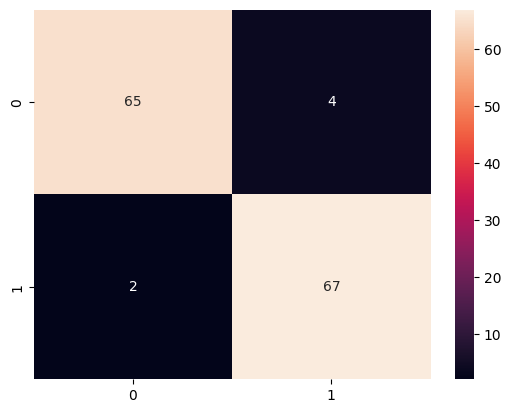

In [78]:
# get validation data from  generator
x_val, y_val = next(valid_generator)


importlib.reload(utils)
from utils import evaluate_model

evaluate_model(model, valid_data, valid_labels)